Proyecto de clusterización en la segmentación de clientes dinamica



Cargar los datos

In [13]:
#Cargar un archivo CSV desde una ruta relativa en un proyecto de Python

from pathlib import Path
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


# Subir dos niveles desde src/internals/ hacia la raíz del repo
from pathlib import Path
import pandas as pd

repo_root = Path.cwd().parents[1]

# Construir la ruta al archivo CSV
ruta_csv = repo_root / "Data" / "Data.csv"

# Verificar si el archivo existe antes de cargarlo
df = pd.read_csv(ruta_csv, sep=None, engine="python")


# Mostrar las primeras filas del DataFrame
print(df.head(3))
df['02.Ultimo Contrato (Recencia)'] = pd.to_datetime(df['02.Ultimo Contrato (Recencia)'])

df.columns

                                              NOMBRE          Nit  \
0                                 99 Franquicias Sas  901778113-1   
1  Abaco Colombia Ajustadores Internacionales S.A.S.  900546125-0   
2   Agencia Digital Creativa Y De Comunicaciones Sas  900940281-0   

  02.Ultimo Contrato (Recencia)  02. R Value (Recencia)  \
0           2022-05-27 00:00:00                    36.0   
1           2025-04-07 00:00:00                     1.0   
2           2024-08-05 00:00:00                     9.0   

   03.F value (Frequencia)  03.M Value (Valor Monetario)  \
0                      2.0                      445786.0   
1                      5.0                      889614.0   
2                      3.0                      186097.0   

   01.Visitas Completadas  Fact Total  02. Contratos Nuevos  Equipos Activos  \
0                     1.0   7488155.0              891571.0              3.0   
1                    12.0  24301141.0             4448069.0             30.0   
2    

Index(['NOMBRE', 'Nit', '02.Ultimo Contrato (Recencia)',
       '02. R Value (Recencia)', '03.F value (Frequencia)',
       '03.M Value (Valor Monetario)', '01.Visitas Completadas', 'Fact Total',
       '02. Contratos Nuevos', 'Equipos Activos', '01.Meses Activo', 'Sector',
       'Tamaño', 'DiasPago', 'Productosadquiridos'],
      dtype='object')

Crear el modelo de rfm


Modelo rfm con cuantiles de recencia , frequencia, monetario



'NOMBRE', 'Nit', '02.Ultimo Contrato (Recencia)',
       '02. R Value (Recencia)', '03.F value (Frequencia)',
       '03.M Value (Valor Monetario)', '01.Visitas Completadas', 'Fact Total',
       '02. Contratos Nuevos', 'Equipos Activos', '01.Meses Activo', 'Sector',
       'Tamaño', 'DiasPago', 'Productosadquiridos']

In [10]:


#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt

df_rfm_Clasico = df[['Nit','02. R Value (Recencia)','03.F value (Frequencia)','03.M Value (Valor Monetario)','DiasPago']]
df_rfm_Clasico.rename(columns={
    '02. R Value (Recencia)': 'Recencia',
    '03.F value (Frequencia)': 'Frequencia',
    '03.M Value (Valor Monetario)': 'Valor Monetario',
    'DiasPago':'Dias De Pago'
}, inplace=True)


#calcular lo quartiles
df_rfm_Clasico['r_quartile'] = pd.qcut(df_rfm_Clasico['Recencia'], 4, ['1','2','3','4'])
df_rfm_Clasico['f_quartile'] = pd.qcut(df_rfm_Clasico['Frequencia'], 4, ['4','3','2','1'])
df_rfm_Clasico['m_quartile'] = pd.qcut(df_rfm_Clasico['Valor Monetario'], 4, ['4','3','2','1'])

df_rfm_Clasico['RFMScore'] = df_rfm_Clasico['r_quartile'].astype(str) + df_rfm_Clasico['f_quartile'].astype(str) +df_rfm_Clasico['m_quartile'].astype(str)

df_rfm_Clasico.head()

C:\Users\DPEREZ\AppData\Local\Temp\ipykernel_5140\876220058.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_Clasico.rename(columns={
C:\Users\DPEREZ\AppData\Local\Temp\ipykernel_5140\876220058.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_Clasico['r_quartile'] = pd.qcut(df_rfm_Clasico['Recencia'], 4, ['1','2','3','4'])
C:\Users\DPEREZ\AppData\Local\Temp\ipykernel_5140\876220058.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,Nit,Recencia,Frequencia,Valor Monetario,Dias De Pago,r_quartile,f_quartile,m_quartile,RFMScore
0,901778113-1,36.0,2.0,445786.0,96.055556,4,4,2,442
1,900546125-0,1.0,5.0,889614.0,32.041667,1,3,1,131
2,900940281-0,9.0,3.0,186097.0,23.571429,3,4,4,344
3,901161983-3,2.0,13.0,872017.0,40.940426,1,2,1,121
4,901617533-1,6.0,1.0,844228.0,47.500000,2,4,1,241


C:\Users\DPEREZ\AppData\Local\Temp\ipykernel_5140\1123156084.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='Recencia', ylabel='Dias De Pago'>

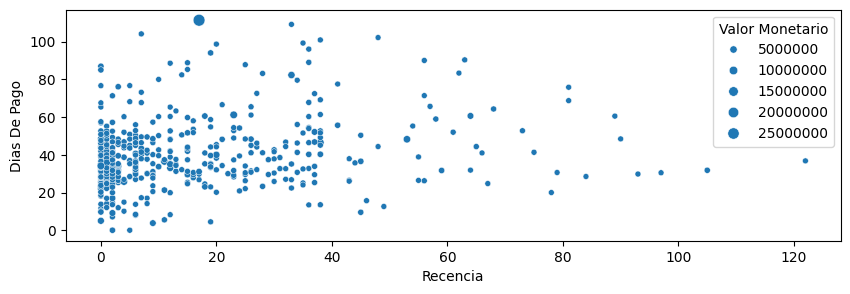

In [12]:
plt.figure(figsize=(10, 3))
sns.scatterplot(
    data=df_rfm_Clasico, 
    x='Recencia', 
    y='Dias De Pago', 
    size='Valor Monetario',
    palette='viridis', 
    s=100, 
    alpha=1
)

APLICANDO FUZZY C-MEANS

In [19]:
import numpy as np
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

X = df_rfm_Clasico[['Recencia', 'Frequencia', 'Valor Monetario']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_T = X_scaled.T

# Paso 2: Probar distintos valores de c
results = []
range_n_clusters = range(3,15)

for c in range_n_clusters:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X_scaled_T, c=c, m=2.0, error=0.005, maxiter=1000, init=None
    )
    
    # Asignación dura
    labels = np.argmax(u, axis=0)
    
    # Calcular Silhouette Score
    try:
        score = silhouette_score(X_scaled, labels)
        results.append((c, score, labels, cntr, u, fpc))
    except:
        # Si no puede calcularse (por ejemplo, 1 solo cluster), lo ignoramos
        continue

# Seleccionar el mejor resultado
best = max(results, key=lambda x: x[1])
best_c, best_score, best_labels, best_cntr, best_u, best_fpc = best

print(f"Mejor número de clusters: {best_c}")
print(f"Mejor Silhouette Score: {best_score:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {best_fpc:.4f}")

# Guardar el mejor resultado en el dataframe
df_rfm_Clasico['cluster_fcm'] = best_labels

# Número de clusters (puedes ajustar esto o hacer una búsqueda)
n_clusters = best_c

# Aplicar Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled_T, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None
)

# u: matriz de pertenencia [n_clusters x n_samples]
# Convertir a etiquetas duras: la mayor pertenencia
labels_fuzzy = np.argmax(u, axis=0)

# Asignar al DataFrame
df_rfm_Clasico['cluster_fcm'] = labels_fuzzy

score = silhouette_score(X_scaled, labels_fuzzy)
print(f"Silhouette score (Fuzzy C-Means): {score:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")

Mejor número de clusters: 3
Mejor Silhouette Score: 0.4831
Fuzzy Partition Coefficient (FPC): 0.7343
Silhouette score (Fuzzy C-Means): 0.4831
Fuzzy Partition Coefficient (FPC): 0.7343


C:\Users\DPEREZ\AppData\Local\Temp\ipykernel_34164\4278039457.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_Clasico['cluster_fcm'] = best_labels
C:\Users\DPEREZ\AppData\Local\Temp\ipykernel_34164\4278039457.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_Clasico['cluster_fcm'] = labels_fuzzy


APLICANDO OPTICS


In [28]:
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
from itertools import product
import pandas as pd

X_scaled = scaler.fit_transform(X)

min_samples_list = [3, 4, 6, 7]
xi_list = [0.005, 0.05, 0.1]
results = []

for min_samples, xi in product(min_samples_list, xi_list):
    optics = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=0.05)
    labels_op = optics.fit_predict(X_scaled)
    
    mask = labels_op != -1
    n_clusters = len(set(labels_op[mask]))
    
    if n_clusters > 1 and mask.sum() > 10:
        try:
            score = silhouette_score(X_scaled[mask], labels_op[mask])
        except:
            score = -1
    else:
        score = -1
    
    results.append({
        'min_samples': min_samples,
        'xi': xi,
        'silhouette': score,
        'n_clusters': n_clusters,
        'labels': labels_op  # Correcto: guarda los labels generados en este loop
    })

df_results = pd.DataFrame(results)

# Mostrar todos los resultados para analizar
print(df_results.sort_values('silhouette', ascending=False)[['min_samples', 'xi', 'n_clusters', 'silhouette']])

# Elegir el mejor (si hay alguno válido)
if df_results['silhouette'].max() > 0:
    best_result = df_results.sort_values('silhouette', ascending=False).iloc[0]
    df_rfm_Clasico['cluster_optics'] = best_result['labels']
    
    print(f"\n✅ Mejor configuración OPTICS:")
    print(f"   min_samples = {best_result['min_samples']}")
    print(f"   xi          = {best_result['xi']}")
    print(f"   clusters    = {best_result['n_clusters']}")
    print(f"   Silhouette  = {best_result['silhouette']:.4f}")
else:
    print("\n⚠️ No se encontraron configuraciones válidas con más de un cluster y buen Silhouette Score.")





    min_samples     xi  n_clusters  silhouette
1             3  0.050           2    0.898511
0             3  0.005           2    0.891846
4             4  0.050           2    0.888695
7             6  0.050           3    0.579916
9             7  0.005           4    0.572712
3             4  0.005           3    0.555374
10            7  0.050           4    0.533229
6             6  0.005           5    0.486807
2             3  0.100           1   -1.000000
5             4  0.100           1   -1.000000
8             6  0.100           1   -1.000000
11            7  0.100           1   -1.000000

✅ Mejor configuración OPTICS:
   min_samples = 3
   xi          = 0.05
   clusters    = 2
   Silhouette  = 0.8985


C:\Users\DPEREZ\AppData\Local\Temp\ipykernel_34164\3414074708.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_Clasico['cluster_optics'] = best_result['labels']


APLICACION DE LA TECNICA KMEANS AL MODELO DE RFM CLASICO


Cluster Quality Metrics:
   k  Silhouette  Davies-Bouldin  Calinski-Harabasz
0  6    0.443065        0.546762         329.776978


C:\Users\DPEREZ\AppData\Local\Temp\ipykernel_34164\2567191039.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_Clasico['Cluster'] = kmeans.fit_predict(rfm_scaled)


<Axes: xlabel='Recencia', ylabel='Valor Monetario'>

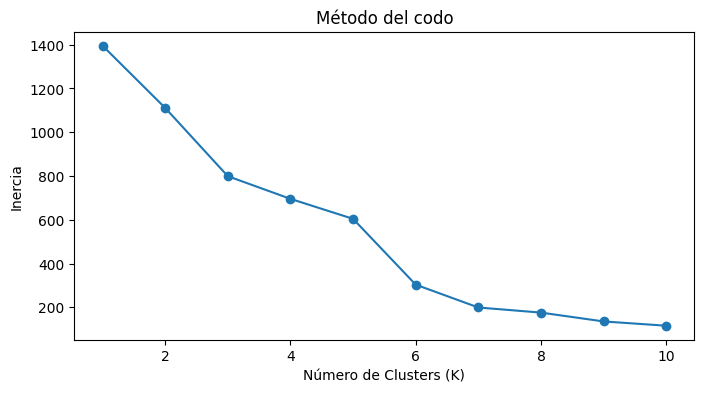

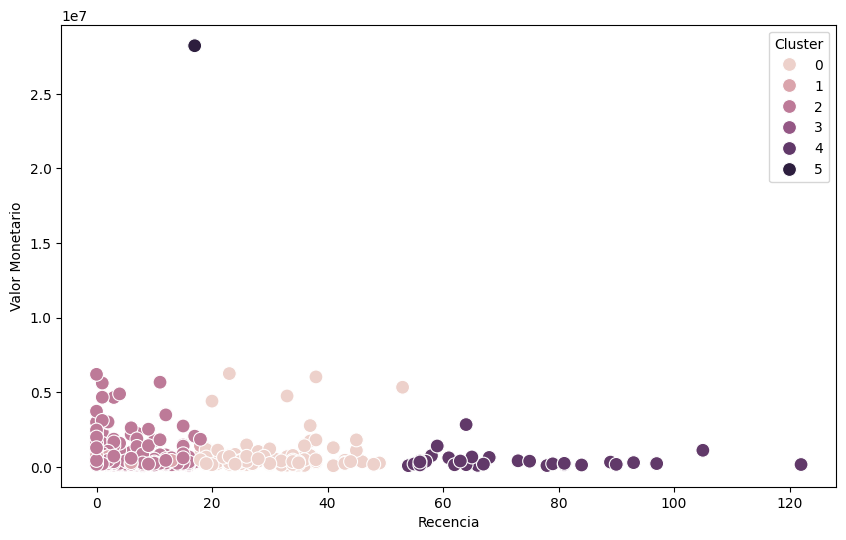

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns

# Supongamos que tu DataFrame se llama rfm_df
rfm_features = df_rfm_Clasico[['Recencia', 'Frequencia', 'Valor Monetario']].copy()

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

#numero optimo de clusters usando el método del codo
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Graficamos la inercia para ver el "codo"
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
#plt.show()


# Aplicar KMeans con el número óptimo de clusters
clusters_optimo = 6  # Basado en el gráfico del codo
kmeans = KMeans(n_clusters=clusters_optimo, random_state=42)
df_rfm_Clasico['Cluster'] = kmeans.fit_predict(rfm_scaled)

#summarize los clusters
cluster_summary = df_rfm_Clasico.groupby('Cluster')[['Recencia', 'Frequencia', 'Valor Monetario']].mean()
#print(cluster_summary)

#Evaluar la calidad del clustering
labels = df_rfm_Clasico['Cluster']
silhouette = silhouette_score(rfm_scaled, labels)
dbi = davies_bouldin_score(rfm_scaled, labels)
ch_index = calinski_harabasz_score(rfm_scaled, labels)

results_df = pd.DataFrame({
        'k': [clusters_optimo],
        'Silhouette': [silhouette],
        'Davies-Bouldin': [dbi],
        'Calinski-Harabasz': [ch_index]
    })
print("\nCluster Quality Metrics:")
print(results_df)

#Visualizar los clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_rfm_Clasico, x='Recencia', 
                y='Valor Monetario', hue='Cluster', 
                s=100)    



DBSCAN

In [113]:
from tqdm import tqdm
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Preparar datos escalados
X = df_rfm_Clasico[['Recencia', 'Frequencia', 'Valor Monetario']]
X_scaled = StandardScaler().fit_transform(X)

# Rango de parámetros a explorar
eps_values = np.arange(0.1, 2.0, 0.1)
min_samples_values = range(3, 11)

# Almacenar resultados
results = []

for eps in tqdm(eps_values, desc="Probando eps"):
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)

        # Excluir ruido (-1) para evaluación
        mask = labels != -1
        if len(set(labels[mask])) < 2:
            continue  # Necesitamos al menos 2 clusters válidos

        try:
            silhouette = silhouette_score(X_scaled[mask], labels[mask])
            dbi = davies_bouldin_score(X_scaled[mask], labels[mask])
            chi = calinski_harabasz_score(X_scaled[mask], labels[mask])

            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': len(set(labels)) - (1 if -1 in labels else 0),
                'n_noise': sum(labels == -1),
                'silhouette': silhouette,
                'davies_bouldin': dbi,
                'calinski_harabasz': chi
            })
        except:
            continue  # Algunas combinaciones pueden fallar silenciosamente

# Convertir resultados en DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Ordenar por Silhouette Score (o cualquier otro criterio)
top_silhouette = results_df.sort_values(by='silhouette', ascending=False).head()
top_silhouette


Probando eps: 100%|██████████| 19/19 [00:00<00:00, 28.95it/s]

    eps  min_samples  n_clusters  n_noise  silhouette  davies_bouldin  \
0   0.1            3          18      213    0.099284        0.680501   
1   0.1            4          11      256    0.260810        0.586677   
2   0.1            5           6      296    0.428876        0.571404   
3   0.1            6           4      321    0.446217        0.607510   
4   0.1            7           5      330    0.489716        0.591397   
5   0.1            8           5      357    0.466459        0.618032   
6   0.1            9           6      362    0.354060        0.657733   
7   0.1           10           4      375    0.432995        0.728361   
8   0.2            3          12       80    0.288707        0.476696   
9   0.2            4           8      101    0.272290        0.450431   
10  0.2            5           6      124    0.245105        0.454185   
11  0.2            6           3      144    0.235348        0.546015   
12  0.2            7           3      145    0.2345

,eps,min_samples,n_clusters,n_noise,silhouette,davies_bouldin,calinski_harabasz
25,0.4,6,2,45,0.713016,0.265582,92.636679
24,0.4,5,2,40,0.706402,0.271112,86.570763
23,0.4,4,2,40,0.706402,0.271112,86.570763
29,0.5,6,2,33,0.701305,0.274938,84.199984
28,0.5,5,2,30,0.699346,0.276225,83.425936


In [114]:
# Normalizar las métricas para hacer ranking compuesto
from sklearn.preprocessing import MinMaxScaler

rank_df = results_df.copy()

# Invertimos DBI (porque menor es mejor) y escalamos todo entre 0 y 1
scaler = MinMaxScaler()
rank_df[['silhouette_norm', 'dbi_norm', 'chi_norm']] = scaler.fit_transform(
    pd.DataFrame({
        'silhouette_norm': rank_df['silhouette'],
        'dbi_norm': -rank_df['davies_bouldin'],  # invertimos DBI
        'chi_norm': rank_df['calinski_harabasz']
    })
)

# Ranking compuesto (puedes ajustar los pesos si quieres)
rank_df['composite_score'] = (
    0.4 * rank_df['silhouette_norm'] + 
    0.3 * rank_df['dbi_norm'] + 
    0.3 * rank_df['chi_norm']
)

# Ordenamos por mejor puntuación
best = rank_df.sort_values(by='composite_score', ascending=False).head(5)
best[['eps', 'min_samples', 'n_clusters', 'n_noise', 'silhouette', 'davies_bouldin', 'calinski_harabasz', 'composite_score']]


,eps,min_samples,n_clusters,n_noise,silhouette,davies_bouldin,calinski_harabasz,composite_score
25,0.4,6,2,45,0.713016,0.265582,92.636679,0.732862
24,0.4,5,2,40,0.706402,0.271112,86.570763,0.722280
23,0.4,4,2,40,0.706402,0.271112,86.570763,0.722280
29,0.5,6,2,33,0.701305,0.274938,84.199984,0.715435
28,0.5,5,2,30,0.699346,0.276225,83.425936,0.712984


In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

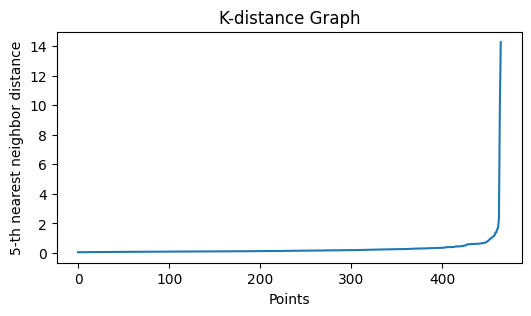

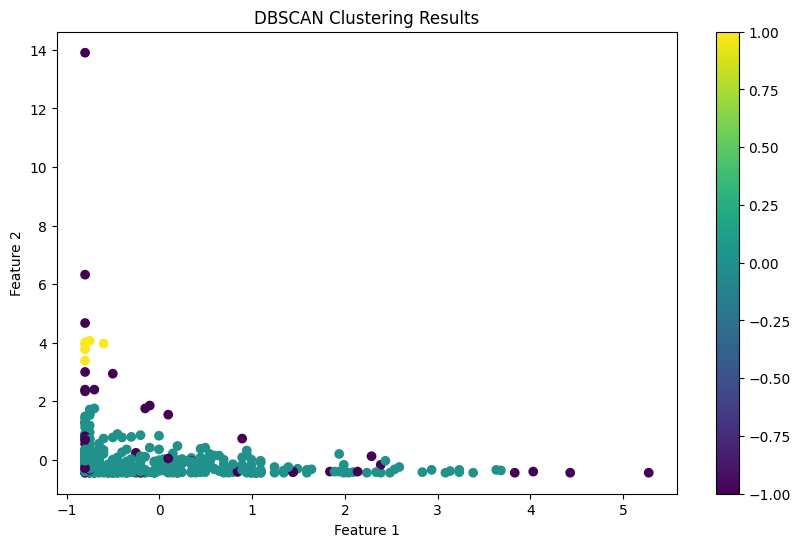

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
#dataframe

# Select only numeric features for DBSCAN
features_for_dbscan = df_rfm_Clasico[['Recencia', 'Frequencia', 'Valor Monetario']].values

# Scale the features
features_scaled = StandardScaler().fit_transform(features_for_dbscan)

# Function to plot k-distance graph
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(6, 3))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()

# Plot k-distance graph
plot_k_distance_graph(features_scaled, k=5)

# Perform DBSCAN clustering
epsilon = 0.4  # Chosen based on k-distance graph
min_samples = 6  # 2 * num_features (2D data)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(features_scaled)

# Visualize the results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_scaled[:, 0],features_scaled[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Asegúrate de excluir los puntos ruido (-1) si quieres evaluar solo los clusters
mask = labels != -1
X_clustered = features_scaled[mask]
labels_clustered = labels[mask]

silhouette = silhouette_score(X_clustered, labels_clustered)
dbi = davies_bouldin_score(X_clustered, labels_clustered)
ch_index = calinski_harabasz_score(X_clustered, labels_clustered)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {dbi:.3f}")
print(f"Calinski-Harabasz Index: {ch_index:.3f}")



In [143]:
# Print number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')



from tqdm import tqdm

# Preparar datos escalados
X = df_rfm_Clasico[['Recencia', 'Frequencia', 'Valor Monetario']]
X_scaled = StandardScaler().fit_transform(X)

# Rango de parámetros a explorar
eps_values = np.arange(0.1, 2.0, 0.1)
min_samples_values = range(3, 11)

# Almacenar resultados
results = []

for eps in tqdm(eps_values, desc="Probando eps"):
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)

        # Excluir ruido (-1) para evaluación
        mask = labels != -1
        if len(set(labels[mask])) < 2:
            continue  # Necesitamos al menos 2 clusters válidos

        try:
            silhouette = silhouette_score(X_scaled[mask], labels[mask])
            dbi = davies_bouldin_score(X_scaled[mask], labels[mask])
            chi = calinski_harabasz_score(X_scaled[mask], labels[mask])

            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': [len(set(labels))],
                'n_noise': sum(labels == -1),
                'silhouette': silhouette,
                'davies_bouldin': dbi,
                'calinski_harabasz': chi
            })
        except:
            continue  # Algunas combinaciones pueden fallar silenciosamente

# Convertir resultados en DataFrame
results_df = pd.DataFrame(results)


Number of clusters: 2
Number of noise points: 45


Probando eps: 100%|██████████| 19/19 [00:00<00:00, 26.21it/s]


HDBSCAN APLICADO

Mejor min_cluster_size: 25 con silhouette score: 0.5792


C:\Users\DPEREZ\AppData\Local\Temp\ipykernel_34164\2303519222.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_Clasico['cluster'] = cluster_labels


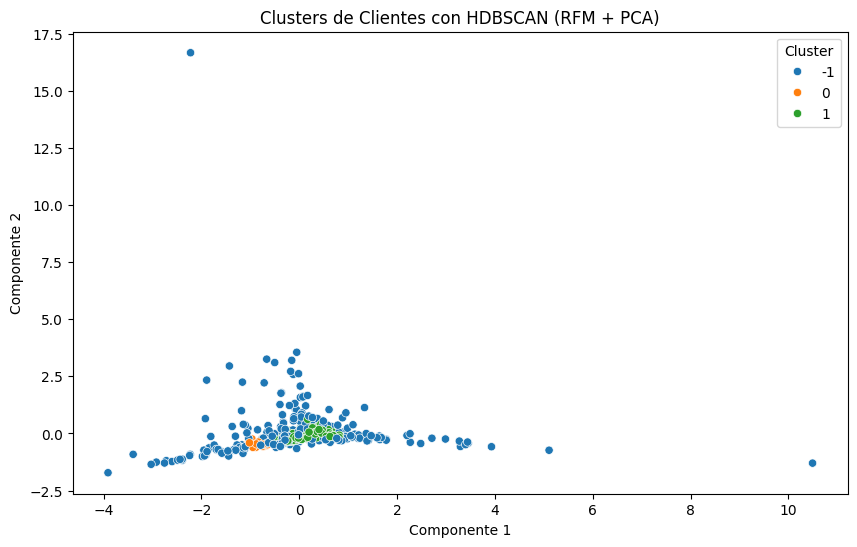

Número de clusters encontrados: 2
Número de puntos considerados como ruido: 208


In [29]:
import hdbscan
# Supongamos que tu DataFrame se llama rfm_df

best_score = -1
best_size = None
scores = []

for min_size in range(5, 51, 5):  # Prueba valores de 5 a 50
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_size, min_samples=5,cluster_selection_method='leaf')
    labels = clusterer.fit_predict(rfm_scaled)
    
    # Filtra outliers (etiquetas -1)
    mask = labels != -1
    if len(set(labels[mask])) > 1:  # Necesita al menos 2 clusters para silhouette
        score = silhouette_score(rfm_scaled[mask], labels[mask])
        scores.append((min_size, score))
        
        if score > best_score:
            best_score = score
            best_size = min_size

print(f"Mejor min_cluster_size: {best_size} con silhouette score: {best_score:.4f}")



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Crear y entrenar el modelo
N_CLUSTERS = best_size  # Basado en el mejor min_cluster_size encontrado
clusterer = hdbscan.HDBSCAN(min_cluster_size=best_size, min_samples=5)
cluster_labels = clusterer.fit_predict(rfm_scaled)

# Añadir los labels al dataframe
df_rfm_Clasico['cluster'] = cluster_labels
# Reducción a 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(rfm_scaled)

# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='tab10')
plt.title('Clusters de Clientes con HDBSCAN (RFM + PCA)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Cluster')
plt.show()

import numpy as np

n_clusters = len(np.unique(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de puntos considerados como ruido: {n_noise}")




APLICANDO MEANSHIFT


Bandwidth Value: 0.1


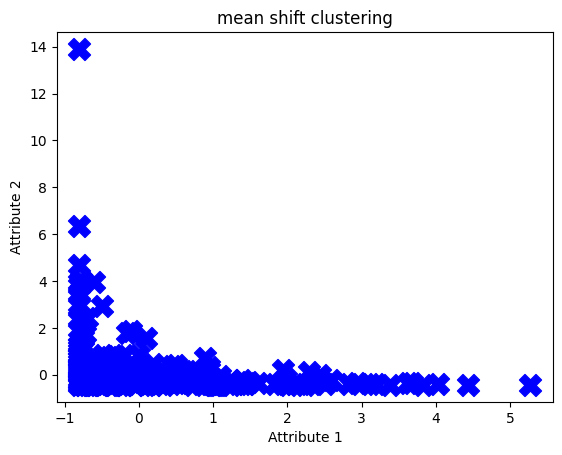

Bandwidth Value: 1.0


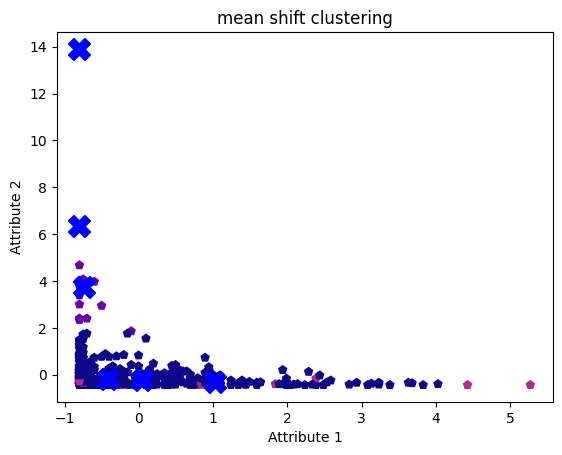

Bandwidth Value: 2.0


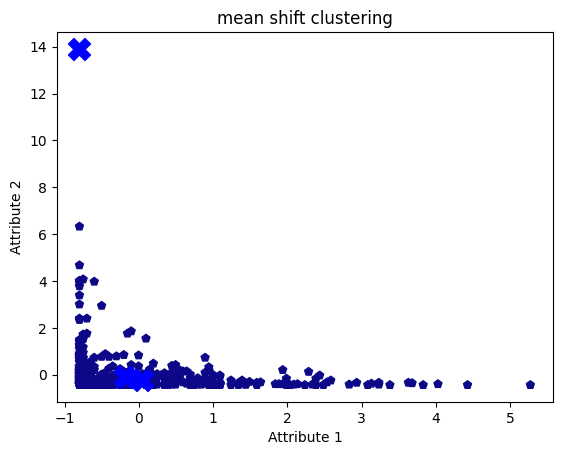

In [ ]:
#meanShift
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

#HDBSCAN
from sklearn.cluster import HDBSCAN# Supongamos que tu DataFrame se llama rfm_df
rfm_features = df_rfm_Clasico[['Recencia', 'Frequencia', 'Valor Monetario']].copy()

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)


#Tunning bandwidth Try different bandwidth values

ms_model = df_rfm_Clasico[['Recencia', 'Frequencia', 'Valor Monetario']]
ms_model_scaled = StandardScaler().fit_transform(X)

bandwidth_values = [0.1, 1.0, 2.0]

for bw in bandwidth_values:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms.fit(ms_model_scaled)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    print("Bandwidth Value:", bw)
    plt.scatter(ms_model_scaled[:, 0], ms_model_scaled[:, 1], c=labels, cmap='plasma', marker='p')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=250, c='blue', marker='X')
    plt.title('mean shift clustering')
    plt.xlabel('Attribute 1')
    plt.ylabel('Attribute 2')
    plt.show()



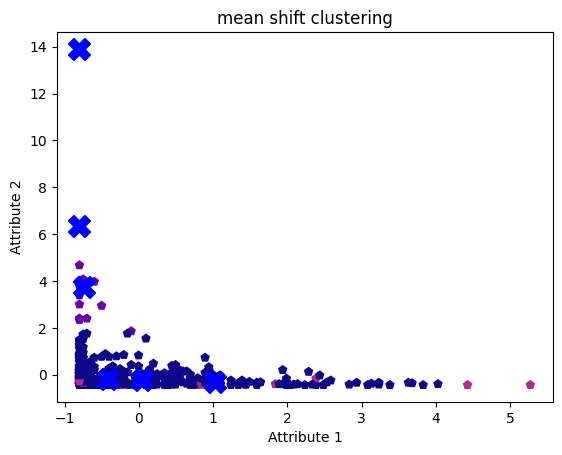

In [141]:
ms = MeanShift(bandwidth=1.0, bin_seeding=True)
ms.fit(ms_model_scaled)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
plt.scatter(ms_model_scaled[:, 0], ms_model_scaled[:, 1], c=labels, cmap='plasma', marker='p')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=250, c='blue', marker='X')
plt.title('mean shift clustering')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.show()

In [142]:
# Evaluar la calidad del clustering
labels = ms.labels_
silhouette = silhouette_score(ms_model_scaled, labels)
dbi = davies_bouldin_score(ms_model_scaled, labels)
ch_index = calinski_harabasz_score(ms_model_scaled, labels)
results_df = pd.DataFrame({
        'cluster':  [len(set(labels))],
        'Bandwidth': [1.0],
        'Silhouette': [silhouette],
        'Davies-Bouldin': [dbi],
        'Calinski-Harabasz': [ch_index]
    })
print("\nCluster Quality Metrics for Mean Shift:")
print(results_df)



Cluster Quality Metrics for Mean Shift:
   cluster  Bandwidth  Silhouette  Davies-Bouldin  Calinski-Harabasz
0        6        1.0    0.566146        0.517064         121.761496


In [131]:
#GaussianMixture
from sklearn.mixture import GaussianMixture


GMM_model = df_rfm_Clasico[['Recencia', 'Frequencia', 'Valor Monetario']]
GMM_model_scaled= StandardScaler().fit_transform(GMM_model)


gmm_results = []

for k in range(2, 15):
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    labels = gmm.fit_predict(GMM_model_scaled)

    silhouette = silhouette_score(GMM_model_scaled, labels)
    dbi = davies_bouldin_score(GMM_model_scaled, labels)
    chi = calinski_harabasz_score(GMM_model_scaled, labels)

    gmm_results.append({
        'n_clusters': k,
        'silhouette': silhouette,
        'davies_bouldin': dbi,
        'calinski_harabasz': chi
    })

gmm_df = pd.DataFrame(gmm_results)
# Mostrar los resultados del GMM
print("\nGaussian Mixture Model Results:")
print(gmm_df)


Gaussian Mixture Model Results:
    n_clusters  silhouette  davies_bouldin  calinski_harabasz
0            2    0.177660        1.549426          65.162452
1            3    0.187787        1.719879          62.299071
2            4    0.171285        1.334020          80.945233
3            5    0.129821        1.242888          75.059195
4            6    0.080149        1.285926         127.236142
5            7    0.064323        1.274940         135.020124
6            8    0.091684        1.213862         143.276991
7            9    0.140926        1.126978         159.707489
8           10    0.070144        1.517807         143.547506
9           11    0.007603        2.589204         121.316079
10          12    0.083328        2.862559         137.087003
11          13    0.023066        1.279806         143.741325
12          14   -0.063399        2.218428         107.415813


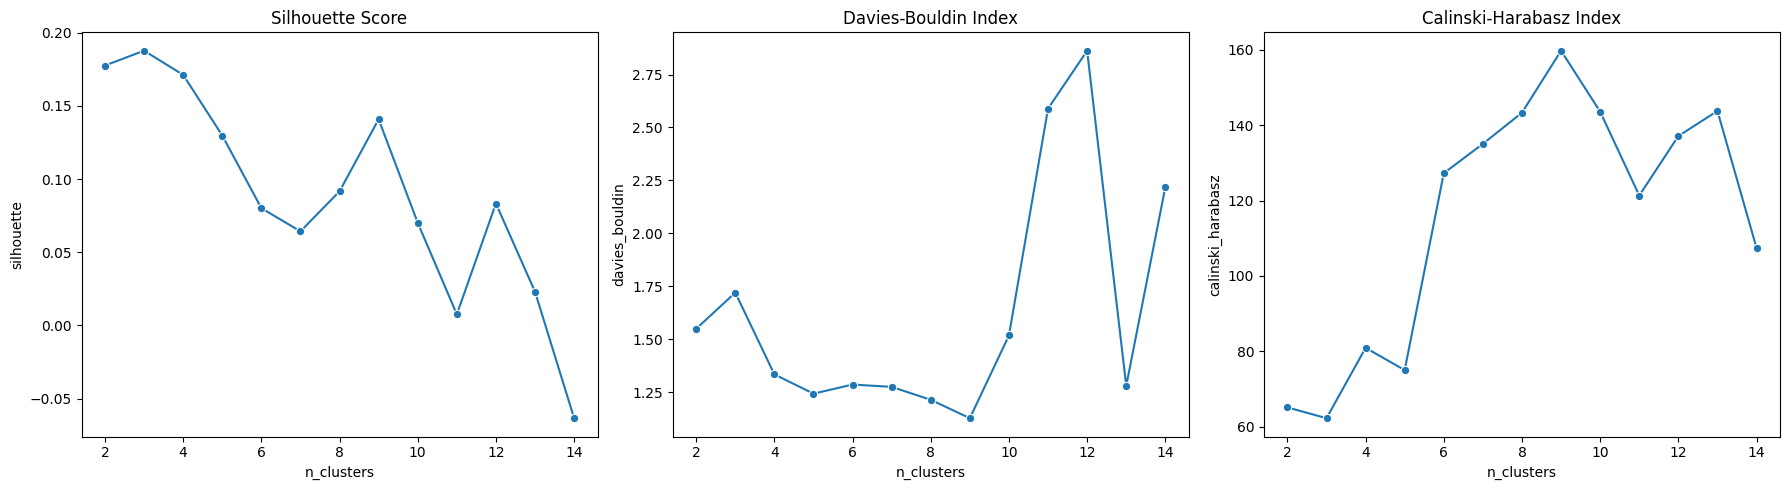

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.lineplot(data=gmm_df, x='n_clusters', y='silhouette', marker='o', ax=axes[0])
axes[0].set_title('Silhouette Score')

sns.lineplot(data=gmm_df, x='n_clusters', y='davies_bouldin', marker='o', ax=axes[1])
axes[1].set_title('Davies-Bouldin Index')

sns.lineplot(data=gmm_df, x='n_clusters', y='calinski_harabasz', marker='o', ax=axes[2])
axes[2].set_title('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()


Cluster Quality Metrics for Mean Shift:
   cluster  Silhouette  Davies-Bouldin  Calinski-Harabasz
0        9    0.140926        1.126978         121.761496


C:\Users\DPEREZ\AppData\Local\Temp\ipykernel_34460\1012691287.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



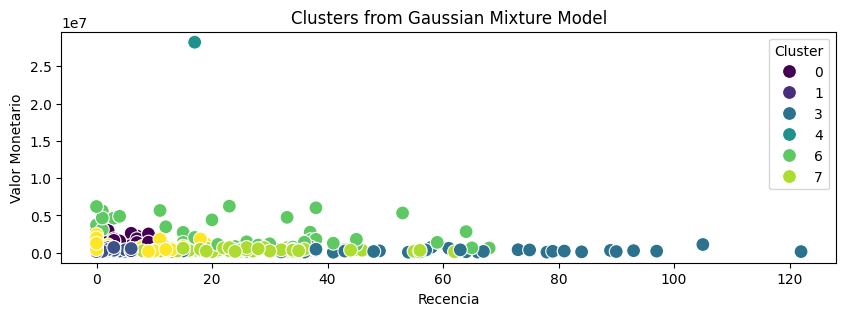

In [ ]:
best_k = 9  
final_gmm = GaussianMixture(n_components=best_k, covariance_type='full', random_state=42)
labels = final_gmm.fit_predict(GMM_model_scaled)
df_rfm_Clasico['GMM_Cluster'] = labels

#indices
silhouette = silhouette_score(GMM_model_scaled, labels)
dbi = davies_bouldin_score(GMM_model_scaled, labels)
chi = calinski_harabasz_score(GMM_model_scaled, labels)

#guardar resultados
gmm_resuts_df = pd.DataFrame({
        'cluster': [len(set(labels))],
        'Silhouette': [silhouette],
        'Davies-Bouldin': [dbi],
        'Calinski-Harabasz': [ch_index]
    })
print("\nCluster Quality Metrics for Mean Shift:")
print(gmm_resuts_df)

# Visualizar los clusters
plt.figure(figsize=(10, 3))
sns.scatterplot(data=df_rfm_Clasico, x='Recencia', 
                y='Valor Monetario', hue='GMM_Cluster', 
                s=100, palette='viridis')       
plt.title('Clusters from Gaussian Mixture Model')
plt.xlabel('Recencia')
plt.ylabel('Valor Monetario')
plt.legend(title='Cluster')
